In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams['font.size'] = 11.5
plt.rcParams['figure.figsize'] = (14,4)
import requests

In [2]:
data = pd.read_excel('/Users/dhkim/PycharmProjects/starbucksDT/total/20200724_starbucksDT_beformNorm.xlsx')

In [836]:
class startbucksDT():
    def __init__(self, base_col='지점명'):
        self.base_col = base_col
        self.columns_list = []
        self.st_infos = {}
        
    def read_data(self, df_path):
        encoding='utf-8'
        try:
            if df_path.split('.')[-1] == 'csv':
                df = pd.read_csv(df_path, sep='\t', encoding=encoding)
                if len(df.columns) == 1:
                    df = pd.read_csv(df_path, encoding=encoding)
            else:
                df = pd.read_excel(df_path, encoding=encoding)
        except Exception as e:
#             print('encoding error\n')
            encoding='cp949'
            if df_path.split('.')[-1] == 'csv':
                df = pd.read_csv(df_path, sep='\t', encoding=encoding)
                if len(df.columns) == 1:
                    df = pd.read_csv(df_path, encoding=encoding)
            else:
                df = pd.read_excel(df_path, encoding=encoding)
        try:
            df = df.sort_values(self.base_col).reset_index(drop=True)
        except:
            before_name = df.columns[0]
            df = df.rename(columns={df.columns[0]:self.base_col})
            df = df.sort_values(self.base_col).reset_index(drop=True)
#             print(f'{df_path} error\nbefore : {before_name}, after : {df.columns[0]}\n')
        if 'Index' in df.columns:
#             print(f'{df_path} error\n contains Index\n')
            df = df.drop('Index', axis=1)
        if 'Unnamed: 0' in df.columns:
            df = df.drop('Unnamed: 0', axis=1)
        
        def mapping_rule(x):
            if '스타벅스' in x:
                x = x.split('스타벅스')[1]
            if x[-3:] == 'DT점':
                x = x.split('DT점')[0]+'DT'
            elif x[-4:] == 'DTR점':
                x = x.split('DTR점')[0]+'DTR'
                
            if (('IC' in x) or ('MBC' in x) or ('SBS' in x)) and x[-2:] != 'DT':
                x = x + '  DT'
            x = x.strip()
            return x
        df[self.base_col] = df[self.base_col].map(lambda x:mapping_rule(x))
        
        return df
    
    def define_data(self):
        apt_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/아파트/20200707_starbucks_apt_final_dist_price.csv')
        st_loc_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/위도경도/starbucksDT_location_info_20200707.csv')
        traffic_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교통량/Starbucks_DT_Traffics_postprocessed.xlsx')
        mac_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/맥드라이브거리/Starbucks_btw_Mac_distance.csv')
        oil_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/주유소거리/20200729_주유소거리.xlsx')
        company_count_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/대기업/company_count_with_starbucks_distance.csv')
        company_dist_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/대기업/20200729_star_company_distance.xlsx')
        st_price_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/공시지가/starbucks_price_3year_mean_diff.csv')
        st_dist_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/스타벅스거리/스타벅스 거리.xlsx')
        intersect_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교차로거리/20200729_교차로거리.xlsx')
        trip_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/관광지/20200721_starbucksDT_beformNorm_transfromAdd.xlsx')
        st_open_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/오픈일/opendate.csv')
        st_review_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/리뷰점수/Total_review_score.xlsx')
        st_class_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/분류/분류.xlsx')
        st_popul_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/유동인구/20200729_유동인구수.xlsx')
        apt_dong_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/동단위아파트세대수/20200729_동단위아파트세대수.xlsx')
        st_recipt_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/네이버영수증/20200729_네이버영수증.xlsx')
        st_full_info = self.read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/총합/fulldata.xlsx')
        compnay_raw_info = self.read_data('/Users/dhkim/PycharmProjects/company_list/starbucks_company_dist_rawdata.csv')
        self.columns_list = [x for x in locals() if x.split('_')[-1] == 'info']
        
        for column in self.columns_list:
            self.st_infos[column] = eval(column)
        
    def check_all_matchs(self):
        info_names = list(self.st_infos.keys())
        st_infos = list(self.st_infos.values())
        record_length = st_infos[0].shape[0]
        equal_info = 0
        for i in range(1, len(info_names)):
            try:
                print(f'{info_names[i-1]} == {info_names[i]} compare!')
                local_sum = np.sum(st_infos[i-1][self.base_col]==st_infos[i][self.base_col])
                equal_info += local_sum
                print(local_sum)
            except:
                print(f'{len(st_infos[i-1][self.base_col])} vs {len(st_infos[i][self.base_col])} not match!')
                continue
                
        if equal_info == record_length * len(info_names):
            return True
        else:
            print('warning.... error')
            return False
        
def check_col_equal(src_df, target_df):
    for col in src_df.columns:
        temp = np.sum(src_df[col] != target_df[col])
        error = 0
        if temp > 0:
            for idx, (a,b) in enumerate(zip(src_df[col], target_df[col])):
                if isinstance(a, str):
                    if ',' in a:
                        a = ''.join(a.split(','))
                if isinstance(b, str):
                    if ',' in b:
                        b = ''.join(b.split(','))
                if pd.isnull(a) or pd.isnull(b):
                    print(src_df.loc[idx, '지점명'], a, b, 'nan error')
                    continue
                this_error = np.abs(float(a)-float(b))
                if this_error > 1e-3:
                    print(src_df.loc[idx, '지점명'], f'original : {a}, total : {b}, critical_error : {this_error}')
                error += this_error
        print(f'col : {col}, error : {error}')

In [837]:
starbucks_info = startbucksDT('지점명')
starbucks_info.define_data()

In [838]:
starbucks_info.columns_list

['apt_info',
 'st_loc_info',
 'traffic_info',
 'mac_info',
 'oil_info',
 'company_count_info',
 'company_dist_info',
 'st_price_info',
 'st_dist_info',
 'intersect_info',
 'trip_info',
 'st_open_info',
 'st_review_info',
 'st_class_info',
 'st_popul_info',
 'apt_dong_info',
 'st_recipt_info',
 'st_full_info',
 'compnay_raw_info']

## 동단위아파트세대수, 유동인구 병합

## 위치 정보 점검

In [628]:
loc_temp = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('경도' in x) or ('위도' in x))]
loc_temp.head()

,지점명,위도,경도
0,강동구청DT,37.52914,127.12379
1,강동암사DT,37.55504,127.13006
2,강릉송정DT,37.77167,128.92311
3,경기광주송정DT,37.40979,127.26021
4,경기광주신현DT,37.40979,127.26021


In [629]:
starbucks_info.st_infos['st_loc_info'] = starbucks_info.st_infos['st_loc_info'].rename(columns={'latitude':'위도','longitude':'경도'})[loc_temp.columns]

In [630]:
starbucks_info.st_infos['st_loc_info'].head()

,지점명,위도,경도
0,강동구청DT,37.529139,127.123792
1,강동암사DT,37.555040,127.130065
2,강릉송정DT,37.771866,128.922926
3,경기광주송정DT,37.424435,127.262841
4,경기광주신현DT,37.359885,127.153039


In [631]:
check_col_equal(starbucks_info.st_infos['st_loc_info'], loc_temp)

col : 지점명, error : 0
경기광주송정DT original : 37.424435, total : 37.40979, critical_error : 0.014645000000001573
경기광주신현DT original : 37.3598852, total : 37.40979, critical_error : 0.04990480000000019
경남사천DT original : 35.0811505, total : 34.94111, critical_error : 0.1400404999999978
경주보문로DT original : 35.83882420000001, total : 35.85322, critical_error : 0.014395799999988412
광주매곡DT original : 35.1898357, total : 37.41599, critical_error : 2.2261542999999975
광주연제DT original : 35.2014475, total : 35.19717, critical_error : 0.0042775000000006
금정남산동DT original : 35.26443370000001, total : 35.26214, critical_error : 0.002293700000009835
다대포DT original : 35.0556365, total : 35.06096, critical_error : 0.005323500000002923
당진시곡DT original : 36.9026106, total : 36.89117, critical_error : 0.011440600000000245
대구앞산DT original : 35.8356394, total : 35.82956, critical_error : 0.0060793999999972925
대구중동DT original : 35.846206, total : 35.84092, critical_error : 0.005286000000005231
대전가수원DT original : 36.

## 교차로 거리 정보 점검

In [540]:
inter_temp = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('교차로' in x))]
inter_temp.head()

,지점명,인근_교차로_거리(m)
0,강동구청DT,95
1,강동암사DT,95
2,강릉송정DT,1400
3,경기광주송정DT,1200
4,경기광주신현DT,2200


In [541]:
starbucks_info.st_infos['intersect_info'].head()

,지점명,인근_교차로_거리(m)
0,강동구청DT,95
1,강동암사DT,95
2,강릉송정DT,1400
3,경기광주송정DT,1200
4,경기광주신현DT,2200


In [542]:
check_col_equal(starbucks_info.st_infos['intersect_info'], inter_temp)

col : 지점명, error : 0
col : 인근_교차로_거리(m), error : 0


## 교통량 정보 점검

In [543]:
tr_temp = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('교통' in x))]
tr_temp.head()

,지점명,교통량_점수,교통량_점수_아침,교통량_점수_저녁,교통량_점수_점심,교통량_점수_주말,교통량_점수_평일
0,강동구청DT,0.833333,1.0,1.5,0.0,0.666667,1.000000
1,강동암사DT,2.333333,2.5,3.0,1.5,2.666667,2.000000
2,강릉송정DT,1.333333,1.0,2.0,1.0,1.333333,1.333333
3,경기광주송정DT,1.833333,1.5,2.0,2.0,1.666667,2.000000
4,경기광주신현DT,1.833333,2.0,2.0,1.5,1.666667,2.000000


In [546]:
# starbucks_info.st_infos['traffic_info']['교통량_점수_아침'] = starbucks_info.st_infos['traffic_info'].apply(lambda row:(row['score1']+row['score4'])/2.0, axis=1)
# starbucks_info.st_infos['traffic_info']['교통량_점수_점심'] = starbucks_info.st_infos['traffic_info'].apply(lambda row:(row['score2']+row['score5'])/2.0, axis=1)
# starbucks_info.st_infos['traffic_info']['교통량_점수_저녁'] = starbucks_info.st_infos['traffic_info'].apply(lambda row:(row['score3']+row['score6'])/2.0, axis=1)
# starbucks_info.st_infos['traffic_info']['교통량_점수_주말'] = starbucks_info.st_infos['traffic_info'].apply(lambda row:(row['score4']+row['score5']+row['score6'])/3.0, axis=1)
# starbucks_info.st_infos['traffic_info']['교통량_점수_평일'] = starbucks_info.st_infos['traffic_info'].apply(lambda row:(row['score1']+row['score2']+row['score3'])/3.0, axis=1)
# starbucks_info.st_infos['traffic_info']['교통량_점수'] = starbucks_info.st_infos['traffic_info']['average_score']

In [545]:
# starbucks_info.st_infos['traffic_info'] = starbucks_info.st_infos['traffic_info'][tr_temp.columns]

In [530]:
# check_col_equal(starbucks_info.st_infos['traffic_info'], tr_temp)

지점명 0
리버사이드팔당DTR nan 2.83333333333333 nan error
진주칠암DT nan 4.0 nan error
화성병점DT nan 3.83333333333333 nan error
교통량_점수 4.584665980189584e-13
리버사이드팔당DTR nan 2.0 nan error
진주칠암DT nan 4.0 nan error
화성병점DT nan 3.5 nan error
교통량_점수_아침 0.0
리버사이드팔당DTR nan 4.0 nan error
진주칠암DT nan 4.0 nan error
화성병점DT nan 4.0 nan error
교통량_점수_저녁 0.0
리버사이드팔당DTR nan 2.5 nan error
진주칠암DT nan 4.0 nan error
화성병점DT nan 4.0 nan error
교통량_점수_점심 0.0
리버사이드팔당DTR nan 3.0 nan error
진주칠암DT nan 4.0 nan error
화성병점DT nan 3.66666666666667 nan error
교통량_점수_주말 4.797273689405301e-13
리버사이드팔당DTR nan 2.66666666666667 nan error
진주칠암DT nan 4.0 nan error
화성병점DT nan 4.0 nan error
교통량_점수_평일 4.908295991867817e-13


In [547]:
# tr_temp.to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교통량/Starbucks_DT_Traffics_postprocessed.xlsx', index=False)

## 리뷰 정보 점검

In [548]:
rv_temp = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('리뷰점수' in x))]
rv_temp.head()

,지점명,리뷰점수
0,강동구청DT,0.466487
1,강동암사DT,0.134676
2,강릉송정DT,0.355633
3,경기광주송정DT,0.223061
4,경기광주신현DT,0.386742


In [549]:
starbucks_info.st_infos['st_review_info'] =  starbucks_info.st_infos['st_review_info'].rename(columns={'Score':'리뷰점수'})[rv_temp.columns]

In [550]:
check_col_equal(starbucks_info.st_infos['st_review_info'], rv_temp)

col : 지점명, error : 0
col : 리뷰점수, error : 0


## 스타벅스 거리 점검

OK

## 주유소 점검

OK

## 맥드라이브 점검

In [839]:
mac_temp = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('맥' in x))]
mac_temp.head()

,지점명,맥도날드_거리
0,강동구청DT,1.197120
1,강동암사DT,1.431670
2,강릉송정DT,0.944571
3,경기광주송정DT,0.305620
4,경기광주신현DT,5.578334


In [840]:
starbucks_info.st_infos['mac_info'] = starbucks_info.st_infos['mac_info'].rename(columns={'distance':'맥도날드_거리'})[mac_temp.columns]

In [841]:
check_col_equal(starbucks_info.st_infos['mac_info'], mac_temp)

col : 지점명, error : 0
강릉송정DT original : 32.575217605409144, total : 0.944571226603927, critical_error : 31.630646378805217
경기광주송정DT original : 10.539849943045454, total : 0.305620030218022, critical_error : 10.234229912827432
경기광주쌍령DT original : 12.479778733263018, total : 0.361871409382894, critical_error : 12.117907323880123
광주선운DT original : 4.4459935052034485, total : 0.128918786961097, critical_error : 4.317074718242352
광주연제DT original : 1.3461128679195915, total : 0.0390327241463156, critical_error : 1.307080143773276
광주주월DT original : 1.5115966134200367, total : 0.0438311935338052, critical_error : 1.4677654198862315
광주지산DT original : 3.619407522818704, total : 0.104950586817896, critical_error : 3.514456936000808
광주지원DT original : 5.017618786569191, total : 0.145493988383168, critical_error : 4.8721247981860225
광주효천DT original : 5.356958140196366, total : 0.155333682882626, critical_error : 5.2016244573137405
국립대구박물관DT original : 1.3872795584330353, total : 0.0402264190534235, c

### full 맥드라이브 정보 변경

In [842]:
starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('맥' in x))] = starbucks_info.st_infos['mac_info']

In [843]:
starbucks_info.st_infos['st_full_info'].loc[starbucks_info.st_infos['st_full_info'].지점명=='제주외도DT', starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('맥' in x))]

,지점명,맥도날드_거리
213,제주외도DT,6.101766


## 관광지 정보 점검

In [633]:
trip_temp = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('관광' in x))]
trip_temp.head()

,지점명,관광지명,관광지_거리,관광지_리뷰수
0,강동구청DT,광진교 8번가,1.569519,70728
1,강동암사DT,서울 암사동 유적,0.618279,45577
2,강릉송정DT,안목해변,2.146935,53753
3,경기광주송정DT,광주 조선백자 요지,2.511173,32675
4,경기광주신현DT,율동공원,2.560675,101122


In [634]:
starbucks_info.st_infos['trip_info'] = starbucks_info.st_infos['trip_info'].loc[:, starbucks_info.st_infos['trip_info'].columns.map(lambda x: ('지점명' in x) or ('관광' in x))]

In [635]:
starbucks_info.st_infos['trip_info'] = starbucks_info.st_infos['trip_info'][trip_temp.columns]

In [636]:
check_col_equal(starbucks_info.st_infos['trip_info'], trip_temp)

col : 지점명, error : 0
col : 관광지명, error : 0
col : 관광지_거리, error : 4.4429737666717983e-13
col : 관광지_리뷰수, error : 0


In [848]:
starbucks_info.st_infos['trip_info'].loc[starbucks_info.st_infos['trip_info'].관광지_거리.map(lambda x:x<0.1), ['지점명','관광지명']]

,지점명,관광지명
50,김포감정DT,피싱파크 진산각


In [637]:
starbucks_info.st_infos['trip_info'].loc[starbucks_info.st_infos['trip_info'].관광지_리뷰수.map(lambda x:x<1), '관광지_리뷰수']

40     0
42     0
99     0
201    0
224    0
Name: 관광지_리뷰수, dtype: int64

## 대기업 정보 점검

In [730]:
company_capital = pd.read_csv('/Users/dhkim/PycharmProjects/company_list/company_list_new.csv', sep='\t', index_col=False)

In [732]:
company_capital = company_capital.drop(company_capital.columns[0], axis=1)
company_capital = company_capital[['기업명', '자본금(원)']]

In [736]:
company_capital[company_capital.기업명 == '한국가스공사']

,기업명,자본금(원)
666,한국가스공사,"461,565,000,000"


In [739]:
def get_company_info(x):
    condition = (company_capital['기업명']==x)
    result = company_capital.loc[condition,'자본금(원)']
    if len(result) == 0:
        condition = (company_capital['기업명'] + '(주)'==x)
        result = company_capital.loc[condition,'자본금(원)']
    if len(result) == 0:
        condition = ('(주)'+company_capital['기업명']==x)
        result = company_capital.loc[condition,'자본금(원)']
    try:
        return result.values[0]
    except:
        return np.nan
company_info2['자본금'] = company_info2['기업명'].map(lambda x:get_company_info(x))

In [805]:
def custom_agg(df):
#     print(df)

    new_dfs = []
    df = df.sort_values('distance')
    df = df.reset_index(drop=True)
    index = [df.iloc[0, 0]]
    for i in range(3):
        new_df = {}
        new_df['기업명'] = df.iloc[i, 1]
        new_df['distance'] = df.iloc[i, 2]
        new_dfs.append(new_df)

    return pd.DataFrame(new_dfs, index = np.repeat(index,3))

def custom_agg2(df):
#     print(df)

    new_dfs = []
    df['자본금'] = df['자본금'].map(lambda x:float(''.join(x.split(','))))
    df = df.sort_values('자본금', ascending=False)
    df = df.reset_index(drop=True)
    index = [df.iloc[0, 0]]
    for i in range(3):
        idx = i
        new_df = {}
        if i < 2:
            if df.iloc[i, 2] > 3:
                continue
            else:
                pass
        else:
            if df.iloc[i, 2] > 3:
                idx = np.argmin(df.iloc[:, 2].values)
            else:
                idx = i
#         print(df.iloc[:, 2].values, idx)
        new_df['기업명'] = df.iloc[idx, 1]
        new_df['distance'] = df.iloc[idx, 2]
        new_df['자본금'] = df.iloc[idx, 3]
        new_dfs.append(new_df)
        break

    return pd.DataFrame(new_dfs, index = index)

In [803]:
np.argmin(company_info2.iloc[2:4,2].values)

0

In [786]:
company_info2.loc[company_info2['자본금'].isnull(),'자본금'] = '1,309,100,000,000'

In [806]:
company_info3 = company_info2.groupby('지점명', as_index=False).apply(lambda x:custom_agg2(x))

In [816]:
company_info3 = company_info3.reset_index(level=1).rename(columns={'level_1':'지점명'})

In [817]:
company_info3.loc[company_info3.지점명.map(lambda x:'미사' in x)]

,지점명,distance,기업명,자본금
248,하남미사DT,2.354995,삼성엔지니어링(주),9.800000e+11


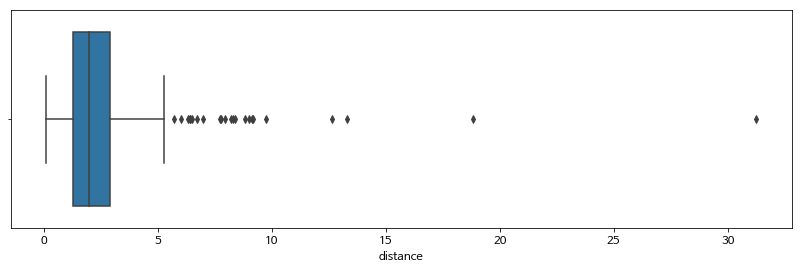

In [819]:
sns.boxplot(company_info3['distance'])

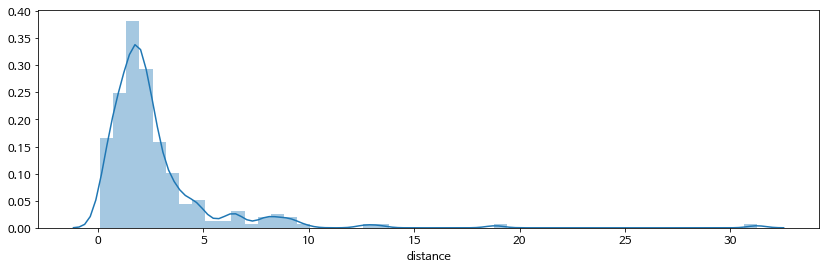

In [830]:
sns.distplot(company_info3['distance'])

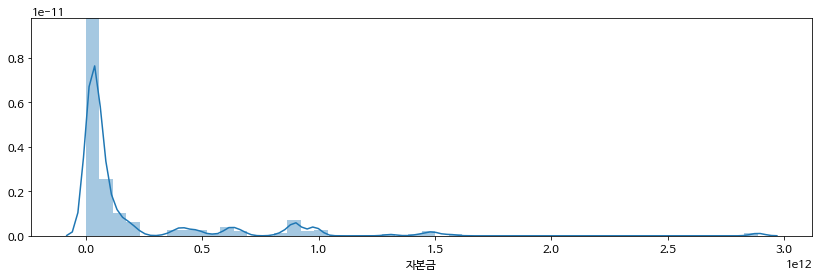

In [831]:
sns.distplot(company_info3['자본금'])

In [833]:
company_info3.columns

Index(['지점명', 'distance', '기업명', '자본금'], dtype='object')

In [834]:
company_info3 = company_info3[['지점명', '기업명', 'distance', '자본금']]

In [835]:
company_info3.to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/대기업/20200729_star_company_distance.xlsx', index=False)

In [744]:
company_info2 = company_info2[['level_1', '기업명', 'distance', '자본금']].rename(columns={'level_1':'지점명'})
company_info2

,지점명,기업명,distance,자본금
0,강동구청DT,일신석재,1.399151e-01,"38,728,305,000"
1,강동구청DT,일신석재,1.484225e-01,"38,728,305,000"
2,강동구청DT,지코(주),4.578149e-01,"32,290,818,000"
3,강동암사DT,현대홈쇼핑,1.286706e+00,"60,000,000,000"
4,강동암사DT,현대홈쇼핑,1.820245e+00,"60,000,000,000"
5,강동암사DT,휠라홀딩스,2.106145e+00,"61,674,420,000"
6,강릉송정DT,대창,2.398367e+00,"45,570,249,500"
7,강릉송정DT,강원랜드,4.689348e+00,"106,970,250,000"
8,강릉송정DT,일성건설(주),2.227284e+01,"27,012,440,000"
9,경기광주송정DT,케이씨(주),1.559966e+00,"6,777,022,000"


In [737]:
company_info2 = starbucks_info.st_infos['compnay_raw_info'].groupby('지점명', as_index=False).apply(lambda x:custom_agg(x)).reset_index()
company_info2

,level_0,level_1,distance,기업명
0,0,강동구청DT,1.399151e-01,일신석재
1,0,강동구청DT,1.484225e-01,일신석재
2,0,강동구청DT,4.578149e-01,지코(주)
3,1,강동암사DT,1.286706e+00,현대홈쇼핑
4,1,강동암사DT,1.820245e+00,현대홈쇼핑
5,1,강동암사DT,2.106145e+00,휠라홀딩스
6,2,강릉송정DT,2.398367e+00,대창
7,2,강릉송정DT,4.689348e+00,강원랜드
8,2,강릉송정DT,2.227284e+01,일성건설(주)
9,3,경기광주송정DT,1.559966e+00,케이씨(주)


In [852]:
company_info3.columns

Index(['지점명', '기업명', 'distance', '자본금'], dtype='object')

In [849]:
starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('기업' in x))].head()

,지점명,최근접_대기업_거리,최근접_대기업_자본금,1km내_대기업_개수,2km내_대기업_개수,3km내_대기업_개수,5km내_대기업_개수
0,강동구청DT,0.139915,3.229082e+10,3,13,33,44
1,강동암사DT,1.286706,6.000000e+10,0,2,12,29
2,강릉송정DT,0.076713,3.662870e-02,0,0,1,2
3,경기광주송정DT,0.049896,5.157543e-01,0,1,1,3
4,경기광주신현DT,0.847238,1.361861e+10,1,1,3,14


## 대기업 정보 대체

In [853]:
starbucks_info.st_infos['st_full_info'].loc[:, '최근접_대기업_거리'] = company_info3.loc[:, 'distance']
starbucks_info.st_infos['st_full_info'].loc[:, '최근접_대기업_자본금'] = company_info3.loc[:, '자본금']
starbucks_info.st_infos['st_full_info'].loc[:, '최근접_대기업명'] = company_info3.loc[:, '기업명']

In [656]:
temp = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('기업' in x))]

In [657]:
starbucks_info.st_infos['company_dist_info'] = starbucks_info.st_infos['company_dist_info'].rename(columns={'distance':'최근접_대기업_거리', '자본금':'최근접_대기업_자본금'})

In [672]:
starbucks_info.st_infos['company_dist_info'][starbucks_info.st_infos['company_dist_info'].지점명=='하남미사DT']

,지점명,기업명,최근접_대기업_거리,최근접_대기업_자본금
248,하남미사DT,삼성엔지니어링(주),7.066210e-13,"14,000,000,000"


In [658]:
starbucks_info.st_infos['company_dist_info'][['최근접_대기업_거리', '최근접_대기업_자본금']].head()

,최근접_대기업_거리,최근접_대기업_자본금
0,0.139915,"32,290,818,000"
1,1.286706,"60,000,000,000"
2,2.398367,"106,970,250,000"
3,1.559966,"1,488,993,125,000"
4,0.847238,"13,618,612,500"


In [659]:
starbucks_info.st_infos['company_count_info'] = starbucks_info.st_infos['company_count_info'].rename(columns={x:y for x,y in zip(starbucks_info.st_infos['company_count_info'].columns[1:], temp.columns[3:])})

In [660]:
starbucks_info.st_infos['company_count_info'][['최근접_대기업_거리', '최근접_대기업_자본금']] = starbucks_info.st_infos['company_dist_info'][['최근접_대기업_거리', '최근접_대기업_자본금']]

In [661]:
starbucks_info.st_infos['company_count_info'] = starbucks_info.st_infos['company_count_info'][temp.columns]

In [670]:
starbucks_info.st_infos['company_count_info'].loc[starbucks_info.st_infos['company_count_info'].최근접_대기업_거리.map(lambda x:x<0.1), :]

,지점명,최근접_대기업_거리,최근접_대기업_자본금,1km내_대기업_개수,2km내_대기업_개수,3km내_대기업_개수,5km내_대기업_개수
157,연희DT,3.792249e-02,"13,900,000,000",1,4,29,193
195,인천송도DT,0.000000e+00,"12,315,000,000",1,6,13,28
220,창원역DT,5.172879e-02,"10,231,563,000",1,2,3,8
248,하남미사DT,7.066210e-13,"14,000,000,000",1,2,5,6


In [662]:
check_col_equal(starbucks_info.st_infos['company_count_info'], temp)

col : 지점명, error : 0
강릉송정DT original : 2.398367404712641, total : 0.0767127598597016, critical_error : 2.3216546448529396
경기광주송정DT original : 1.5599663324990147, total : 0.0498961595371392, critical_error : 1.5100701729618755
경기광주쌍령DT original : 3.278925245744105, total : 0.104877761630862, critical_error : 3.174047484113243
광주선운DT original : 1.0064496453369705, total : 0.0321917024897474, critical_error : 0.9742579428472231
광주연제DT original : 1.6195993523538568, total : 0.0518035460046356, critical_error : 1.5677958063492212
광주주월DT original : 1.6071915735850115, total : 0.0514066781389297, critical_error : 1.5557848954460818
광주지산DT original : 0.7650388251439534, total : 0.0244700789217272, critical_error : 0.7405687462222261
광주지원DT original : 1.964206214406451, total : 0.0628259370706171, critical_error : 1.901380277335834
광주효천DT original : 1.977933014185207, total : 0.0632649943614229, critical_error : 1.914668019823784
국립대구박물관DT original : 1.5189101837721672, total : 0.04858296187115

### full 대기업 정보 변경

In [854]:
#starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('기업' in x))] = starbucks_info.st_infos['company_count_info']

In [855]:
starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('기업' in x))].head(10)

,지점명,최근접_대기업_거리,최근접_대기업_자본금,1km내_대기업_개수,2km내_대기업_개수,3km내_대기업_개수,5km내_대기업_개수,최근접_대기업명
0,강동구청DT,0.139915,3.872830e+10,3,13,33,44,일신석재
1,강동암사DT,2.106145,6.167442e+10,0,2,12,29,휠라홀딩스
2,강릉송정DT,2.398367,4.557025e+10,0,0,1,2,대창
3,경기광주송정DT,1.559966,6.777022e+09,0,1,1,3,케이씨(주)
4,경기광주신현DT,2.784263,1.725000e+11,1,1,3,14,휴비스(주)
5,경기광주쌍령DT,3.278925,1.488993e+12,0,0,0,2,현대자동차(주)
6,경남사천DT,1.974756,4.873755e+11,0,1,3,3,한국항공우주
7,경산중방DT,1.773917,1.333560e+09,0,1,1,1,제이에스코퍼레이션
8,경인교대입구역DT,1.241825,4.517584e+10,1,6,11,16,풍산홀딩스
9,경주보문로DT,6.408657,2.185000e+11,0,0,0,0,대림산업(주)


In [856]:
#starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x: ('지점명' in x) or ('기업' in x))]

## 영수증 정보 점검

In [589]:
naver_reveiw = pd.read_excel('../starbucksDT/postprocess/starbucks_naver_review_analysis_200710.xlsx')
naver_reveiw = naver_reveiw.rename(columns={'loc_name':'지점명'})

In [590]:
def mapping_rule(x):
    if '스타벅스' in x:
        x = x.split('스타벅스')[1]
    if x[-3:] == 'DT점':
        x = x.split('DT점')[0]+'DT'
    elif x[-4:] == 'DTR점':
        x = x.split('DTR점')[0]+'DTR'

    if (('IC' in x) or ('MBC' in x) or ('SBS' in x)) and x[-2:] != 'DT':
        x = x + '  DT'
    x = x.strip()
    return x

In [591]:
naver_reveiw = naver_reveiw.rename(columns={x:'_'.join(x.split(' ')) for x in naver_reveiw.columns})

In [592]:
tar_recipt = starbucks_info.st_infos['st_full_info'].loc[:, starbucks_info.st_infos['st_full_info'].columns.map(lambda x:('지점명' in x) or ('개월' in x))]

In [593]:
naver_reveiw = naver_reveiw[tar_recipt.columns]

In [594]:
naver_reveiw.지점명 = naver_reveiw.지점명.map(lambda x:mapping_rule(x))

In [595]:
check_col_equal(naver_reveiw, tar_recipt)

col : 지점명, error : 0
col : 6개월_영수증_개수, error : 0
col : 3개월_영수증_개수, error : 0
col : 2개월_영수증_개수, error : 0
col : 1개월_영수증_개수, error : 0
col : 6개월_점수, error : 5.639932965095795e-13
col : 3개월_점수, error : 5.551115123125783e-13
col : 2개월_점수, error : 5.582201367815287e-13
col : 1개월_점수, error : 4.933831121434196e-13


In [289]:
a = starbucks_info.st_infos['st_full_info'].loc[starbucks_info.st_infos['st_full_info'].지점명 != starbucks_info.st_infos['st_class_info'].지점명, '지점명']
b = starbucks_info.st_infos['st_class_info'].loc[starbucks_info.st_infos['st_full_info'].지점명 != starbucks_info.st_infos['st_class_info'].지점명, '지점명']
for x,y in zip(a,b):
    print(f"full info:{x}, now info:{y}") 

In [304]:
# st_full_info[['지점명', '인근_교차로_거리(m)']]
# st_full_info[['지점명', '인근_교차로_거리(m)']].to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교차로거리/20200729_교차로거리.xlsx', index=False)
# st_full_info[['지점명', '주유소_거리(m)']]
# st_full_info[['지점명', '주유소_거리(m)']].to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/주유소거리/20200729_주유소거리.xlsx', index=False)
# st_full_info[['지점명'] + list(st_full_info.iloc[:, 5:40].columns)].to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/유동인구/20200729_유동인구수.xlsx', index=False)
# st_full_info[['지점명', '동단위_아파트_세대수']]
# st_full_info[['지점명', '동단위_아파트_세대수']].to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/동단위아파트세대수/20200729_동단위아파트세대수.xlsx', index=False)
# total_receipt_info.to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/네이버영수증/20200729_네이버영수증.xlsx', index=False)

In [275]:
st_full_info.columns

Index(['지점명', '분류', '위도', '경도', '오픈일', 'M', 'Tu', 'W', 'Th', 'Fr', 'Sa', 'S',
       '00~03', '03~06', '06~09', '09~12', '12~15', '15~18', '18~21', '12~24',
       'M_20', 'M_25', 'M_29', 'M_34', 'M_39', 'M_44', 'M_49', 'M_54', 'M_59',
       'M_60', 'W_20', 'W_25', 'W_29', 'W_34', 'W_39', 'W_44', 'W_49', 'W_54',
       'W_59', 'W_60', '관광지명', '관광지_거리', '관광지_리뷰수', '교통량_점수', '교통량_점수_아침',
       '교통량_점수_저녁', '교통량_점수_점심', '교통량_점수_주말', '교통량_점수_평일', '맥도날드_거리',
       '인근_스타벅스_거리', '아파트_거리', '아파트_매매가_상한', '아파트_세대수', '아파트_준공년월',
       '인근_교차로_거리(m)', '주유소_거리(m)', '6개월_영수증_개수', '3개월_영수증_개수', '2개월_영수증_개수',
       '1개월_영수증_개수', '1년_점수', '6개월_점수', '3개월_점수', '2개월_점수', '1개월_점수',
       '최근접_대기업_거리', '최근접_대기업_자본금', '1km내_대기업_개수', '2km내_대기업_개수',
       '3km내_대기업_개수', '5km내_대기업_개수', '리뷰점수', '동단위_아파트_세대수', 'Label'],
      dtype='object')

apt_info == st_loc_info compare!
252
st_loc_info == traffic_info compare!
252
traffic_info == mac_info compare!
252
mac_info == oil_info compare!
252
oil_info == company_info compare!
252
company_info == st_price_info compare!
252 vs 220 not match!
st_price_info == st_dist_info compare!
220 vs 252 not match!
st_dist_info == intersect_info compare!
252 vs 249 not match!
intersect_info == trip_info compare!
249 vs 252 not match!
trip_info == st_open_info compare!
252
st_open_info == st_review_info compare!
252
st_review_info == st_class_info compare!
252
st_class_info == st_full_info compare!
252
warning.... error


False

## 데이터 점검 리스트
#### 'mac_info' -> ok,
#### 'intersect_info',-> ok
#### 'st_open_info' -> todo
#### 'st_review_info' -> ok,
#### 'st_class_info' -> ok,

## 공시지가 채우기

In [911]:
starbucks_info.st_infos['st_full_info'] = starbucks_info.st_infos['st_full_info'].drop(['공시지가_3년치_평균','공시지가_3년치_상승률_평균'], axis=1)

In [863]:
test_join = starbucks_info.st_infos['st_full_info'][['지점명', '교통량_점수']]

In [902]:
target_join = starbucks_info.st_infos['st_price_info'][['지점명','3year','3year_diff_mean']].rename(columns={'3year':'공시지가_3년치_평균', '3year_diff_mean':'공시지가_3년치_상승률_평균'})

In [903]:
target_join.head()

,지점명,공시지가_3년치_평균,공시지가_3년치_상승률_평균
0,강동구청DT,2357.166667,19.25
1,강동암사DT,2078.666667,86.00
2,강릉송정DT,125.000000,21.00
3,경기광주송정DT,403.333333,15.50
4,경기광주신현DT,596.000000,3.00


In [893]:
set(target_join.지점명).difference(set(test_join.지점명))

set()

In [892]:
target_join.지점명 = target_join.지점명.map(lambda x:' '.join(x.split('  ')))

/Users/dhkim/.pyenv/versions/3.7.0/envs/xai/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [917]:
starbucks_info.st_infos['st_full_info'] = starbucks_info.st_infos['st_full_info'].join(target_join.set_index('지점명'), on='지점명')

In [918]:
starbucks_info.st_infos['st_full_info'].loc[ starbucks_info.st_infos['st_full_info']['공시지가_3년치_평균'].isnull(), :].shape

(32, 78)

## 중간 저장

In [919]:
 starbucks_info.st_infos['st_full_info'].to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/총합/20200729_fulldata.xlsx', index=False)

In [920]:
starbucks_info.st_infos['st_full_info'].loc[:5, starbucks_info.st_infos['st_full_info'].columns.map(lambda x:'오픈' in x)]

,오픈일
0,2019-06-10
1,2019-02-25
2,2019-12-02
3,2019-12-16
4,2018-12-17
5,2020-02-24


In [923]:
from datetime import date

In [ ]:
date(2020,7,1)

In [925]:
date(2020,7,1)

datetime.date(2020, 7, 1)

In [942]:
def date_to_days(x):
    if x=='nan':
        return np.nan
    splitted = x.split('.')
    if len(splitted) < 3:
        splitted += ['01']
    return (date(2020,7,3) - date(*map(lambda x:int(x),splitted))).days

In [943]:
starbucks_info.st_infos['st_full_info']['오픈일_지난날짜'] = starbucks_info.st_infos['st_full_info']['오픈일'].map(lambda x:str(x).split(' ')[0].replace('-','.')) 

In [944]:
starbucks_info.st_infos['st_full_info']['오픈일_지난날짜'] = starbucks_info.st_infos['st_full_info']['오픈일_지난날짜'].map(lambda x:date_to_days(x))

In [945]:
starbucks_info.st_infos['st_full_info'][['지점명', '오픈일', '오픈일_지난날짜']].describe()

,오픈일_지난날짜
count,252.000000
mean,989.722222
std,652.080314
min,0.000000
25%,428.750000
50%,900.000000
75%,1543.250000
max,2853.000000


In [949]:
starbucks_info.st_infos['st_full_info'].loc[starbucks_info.st_infos['st_full_info']['오픈일_지난날짜'].map(lambda x: x<50), :] 

,지점명,분류,위도,경도,오픈일,M,Tu,W,Th,Fr,...,2km내_대기업_개수,3km내_대기업_개수,5km내_대기업_개수,리뷰점수,동단위_아파트_세대수,Label,최근접_대기업명,공시지가_3년치_평균,공시지가_3년치_상승률_평균,오픈일_지난날짜
28,광주연제DT,사업체,35.19717,126.86629,2020-05-18,48933,47812,49285,49277,50004,...,3,4,9,0.324576,4034,0.452745,엔케이(주),82.333333,4.5,46
55,김해진영DT,IC근처,35.30589,128.73139,2020-06-01,142148,137130,148544,149324,145126,...,1,1,2,0.213756,10155,0.393951,센트랄모텍,159.000000,0.0,32
154,여수학동DT,아파트,34.75983,127.66712,2020-05-18,155820,151672,156225,140737,161479,...,0,0,1,0.259632,1622,0.591479,신도리코,325.000000,13.0,46
251,화성병점DT,IC근처,37.21376,127.05365,2020-07-03,125619,124000,127677,127512,129006,...,3,4,13,0.363115,2760,0.429184,우리들휴브레인(주),NaN,NaN,0


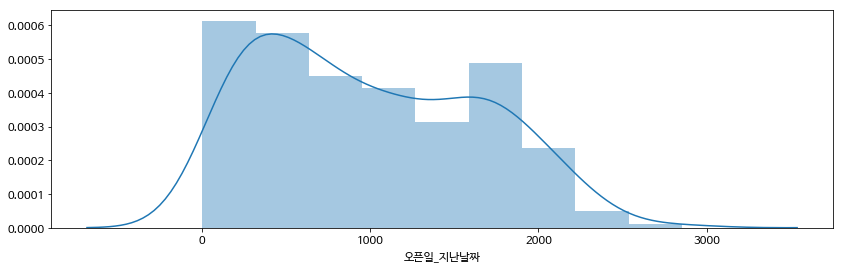

In [951]:
sns.distplot(starbucks_info.st_infos['st_full_info']['오픈일_지난날짜'])

## 오픈일 포함 하고 저장

In [957]:
starbucks_info.st_infos['st_full_info'].to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/총합/20200729_fulldata.xlsx', index=False)

In [895]:
starbucks_info.st_infos['st_price_info'].지점명 = starbucks_info.st_infos['st_price_info'].지점명.map(lambda x:' '.join(x.split('  ')))

In [896]:
starbucks_info.st_infos['st_price_info'].to_excel('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/공시지가/20200729_starbucks_price_3year_mean_diff.xlsx', index=False)

In [857]:
starbucks_info.check_all_matchs()

apt_info == st_loc_info compare!
252
st_loc_info == traffic_info compare!
252
traffic_info == mac_info compare!
252
mac_info == oil_info compare!
252
oil_info == company_count_info compare!
252
company_count_info == company_dist_info compare!
252
company_dist_info == st_price_info compare!
252 vs 220 not match!
st_price_info == st_dist_info compare!
220 vs 252 not match!
st_dist_info == intersect_info compare!
252
intersect_info == trip_info compare!
252
trip_info == st_open_info compare!
252
st_open_info == st_review_info compare!
252
st_review_info == st_class_info compare!
252
st_class_info == st_popul_info compare!
252
st_popul_info == apt_dong_info compare!
252
apt_dong_info == st_recipt_info compare!
252
st_recipt_info == st_full_info compare!
252
st_full_info == compnay_raw_info compare!
252 vs 460656 not match!
warning.... error


False

In [89]:
apt_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/아파트/20200707_starbucks_apt_final_dist_price.csv')

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/아파트/20200707_starbucks_apt_final_dist_price.csv error
 "스타벅스" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/아파트/20200707_starbucks_apt_final_dist_price.csv error
 "점" in 지점명



In [110]:
[x for x in locals() if x.split('_')[-1] == 'info']

['apt_info',
 'st_loc_info',
 'traffic_info',
 'mac_info',
 'oil_info',
 'company_info',
 'st_price_info',
 'st_dist_info',
 'intersect_info',
 'trip_info',
 'st_open_info',
 'st_review_info',
 'st_class_info',
 'st_full_info']

In [82]:
apt_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/아파트/20200707_starbucks_apt_final_dist_price.csv')
st_loc_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/위도경도/starbucksDT_location_info_20200707.csv')
traffic_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교통량/Starbucks_DT_Traffics_postprocessed.xlsx')
mac_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/맥드라이브거리/startbucks_mac_info_20200706.csv')
oil_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/주유소거리/스타벅스DT_to_주유소.xlsx')
company_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/대기업/company_count_with_starbucks_distance.csv')
st_price_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/공시지가/starbucks_price_3year_mean_diff.csv')
st_dist_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/스타벅스거리/스타벅스 거리.xlsx')
intersect_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교차로거리/스타벅스_유명교차로_거리.csv')
trip_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/관광지/20200721_starbucksDT_beformNorm_transfromAdd.xlsx')
st_open_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/오픈일/opendate.csv')
st_review_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/리뷰점수/Total_review_score.xlsx')
st_class_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/분류/분류.xlsx')
st_full_info = read_data('/Users/dhkim/PycharmProjects/starbucksDT/rawdata/총합/fulldata.xlsx')

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/아파트/20200707_starbucks_apt_final_dist_price.csv error
 "스타벅스" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/아파트/20200707_starbucks_apt_final_dist_price.csv error
 "점" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/위도경도/starbucksDT_location_info_20200707.csv error
 "스타벅스" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/위도경도/starbucksDT_location_info_20200707.csv error
 "점" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교통량/Starbucks_DT_Traffics_postprocessed.xlsx error
 "스타벅스" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/교통량/Starbucks_DT_Traffics_postprocessed.xlsx error
 "점" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/맥드라이브거리/startbucks_mac_info_20200706.csv error
 "스타벅스" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawdata/맥드라이브거리/startbucks_mac_info_20200706.csv error
 "점" in 지점명

/Users/dhkim/PycharmProjects/starbucksDT/rawda

In [83]:
st_loc_info

,지점명,latitude,longitude,address
0,강동구청DT,37.529139,127.123792,성내동 550
1,강동암사DT,37.555040,127.130065,암사동 441-12
2,강릉송정DT,37.771866,128.922926,강원도 강릉시 경강로 2402 2020-03-31 18:56:50.526315776
3,경기광주송정DT,37.424435,127.262841,송정동 12-12 1필지
4,경기광주신현DT,37.359885,127.153039,신현리 701-5
5,경기광주쌍령DT,37.398751,127.273318,쌍령동 168
6,경남사천DT,35.081150,128.083701,수석리 320-1
7,경산중방DT,35.827466,128.737040,중방동 847-6
8,경인교대입구역DT,37.535520,126.722153,작전동 852-30 852-31
9,경주보문로DT,35.838824,129.285902,천군동 1584-33 외 1번지(신평동 719-220)


In [75]:
s.values[:][

['스타벅스', '강동암사DT점']

In [3]:
data

,지점명,분류,위도,경도,관광지_거리,관광지_리뷰수,교통량_점수,교통량_점수_아침,교통량_점수_저녁,교통량_점수_점심,...,리뷰점수,DT지수,score_A1,score_A2,score_A3,score_B1,score_B2,score_B3,관광지명,동_아파트_세대수
0,강동구청DT,아파트,37.52914,127.12379,1.569519,70728,0.833333,1.0,1.5,0.0,...,0.466487,0.257667,0.683368,0.680499,0.692616,0.466650,0.401675,0.518674,광진교 8번가,5203
1,강동암사DT,IC근처,37.55504,127.13006,0.618279,45577,2.333333,2.5,3.0,1.5,...,0.134676,0.144355,0.410386,0.482700,0.534386,0.106913,0.174677,0.140194,서울 암사동 유적,3763
2,강릉송정DT,관광,37.77167,128.92311,2.146935,53753,1.333333,1.0,2.0,1.0,...,0.355633,0.235143,0.422412,0.750834,0.385119,0.172869,0.085291,0.167834,안목해변,2267
3,경기광주송정DT,IC근처,37.40979,127.26021,2.511173,32675,1.833333,1.5,2.0,2.0,...,0.223061,0.172486,0.297185,0.545587,0.297661,0.088318,0.048378,0.090124,광주 조선백자 요지,2370
4,경기광주신현DT,IC근처,37.40979,127.26021,2.560675,101122,1.833333,2.0,2.0,1.5,...,0.386742,0.064256,0.473918,0.432452,0.438822,0.219672,0.120231,0.216092,율동공원,11029
5,경기광주쌍령DT,아파트,37.39875,127.26021,1.518413,19780,1.500000,1.0,1.5,2.0,...,0.175603,0.103373,0.295413,0.595348,0.330936,0.082221,0.063611,0.089596,백련암(경기),2381
6,경남사천DT,사업체,34.94111,128.08639,0.710316,23449,1.500000,1.5,1.0,2.0,...,0.282932,0.195136,0.395314,0.380050,0.399520,0.156203,0.101385,0.162684,수양공원 (구 산성공원),3980
7,경산중방DT,아파트,35.82724,128.73672,1.087163,20780,1.833333,1.0,2.0,2.5,...,0.462436,0.525691,0.556077,0.505294,0.504747,0.298683,0.166859,0.290314,혜광사(경산),2511
8,경인교대입구역DT,IC근처,37.53552,126.72215,0.526604,28795,2.666667,2.5,2.5,3.0,...,0.355219,0.739961,0.555640,0.563726,0.585273,0.305223,0.266393,0.342379,부평향교,12139
9,경주보문로DT,관광,35.85322,129.26870,0.378324,216315,0.666667,1.0,1.0,0.0,...,0.185750,0.446729,0.362102,0.387270,0.423287,0.116143,0.114921,0.133948,경주월드 어뮤즈먼트,0
